### Introdução à Programação de Computadores - 2020/2

# **Projeto Prático Final** 


Professores:

*   Jefersson Alex dos Santos - jefersson@dcc.ufmg.br
*   João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Na célula abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.



In [ ]:
# Baixando os dados do site oficial (link alternativo abaixo)
!wget https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    file = open(filename, 'r', encoding='ISO-8859-1')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("Cfem.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

--2021-03-30 03:14:06--  https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv
Resolving app.dnpm.gov.br (app.dnpm.gov.br)... 200.198.193.243
Connecting to app.dnpm.gov.br (app.dnpm.gov.br)|200.198.193.243|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://app.anm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv [following]
--2021-03-30 03:14:07--  https://app.anm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv
Resolving app.anm.gov.br (app.anm.gov.br)... 200.198.193.243
Connecting to app.anm.gov.br (app.anm.gov.br)|200.198.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190555938 (182M) [application/octet-stream]
Saving to: ‘Cfem.csv.1’

Cfem.csv.1            5%[>                   ]   9.62M   638KB/s    eta 5m 0s  ^C
['Ano de Referencia', 'Mes de Referencia', 'Processo', 'Ano do Processo', 'Tipo PF/PJ', 'CPF/CNPJ', 'Pessoa Física/Jurídica', 'Fase do Processo', 'Substância', 'Uf', 'Município', 'Unidade de Medida', 

Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


(1214023,)


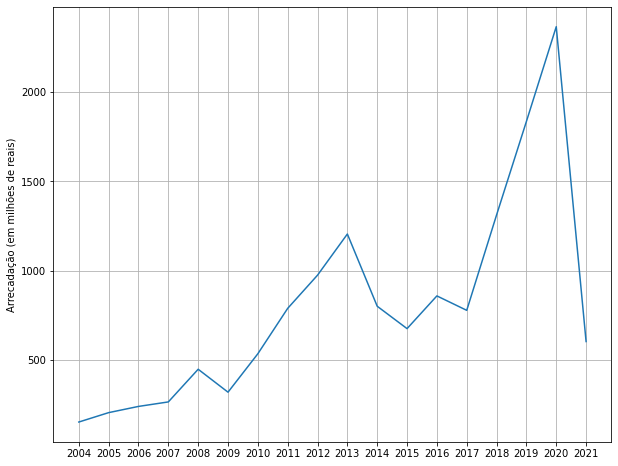

In [ ]:
# Implemente seu código aqui!
import numpy as np
import matplotlib.pyplot as plt

dadosvet = np.array(dados)
print(np.shape(dadosvet)) # Descobrindo quantas linhas temos

anos = list(range(2004,2022))

estado = 'MG'

conta = {}

for i in range(0,1211888):
  dadosvet[i][0] = int(dadosvet[i][0]) # Transformando a primeira coluna em int
  dadosvet[i][-1] = float(dadosvet[i][-1].replace(',','.')) #Usei para transformar a ultima coluna em float e dps bugou
  valor = dadosvet[i][-1]
  #print(valor)
  ano = dadosvet[i][0]
  if ano in anos and dadosvet[i][9] == estado: #Anos que vamos selecionar
    conta[ano] = conta.get(ano, 0) + valor #acumulando o valor daquele ano

lista = []

for ano, valor in conta.items(): #lista com os valores dos anos
  lista.append((valor,ano))

x=[]
y=[]
for j in lista:
  x.append(j[1]) #eixo x = anos
  y.append(j[0]/10**6) #eixo y = valores

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(111)

ax1.plot(np.arange(len(x)), y)

ax1.set_xticks(np.arange(len(x)))

ax1.set_xticklabels(x)

ax1.grid()

plt.ylabel("Arrecadação (em milhões de reais)")

plt.show()

Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Implemente um código capaz de plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


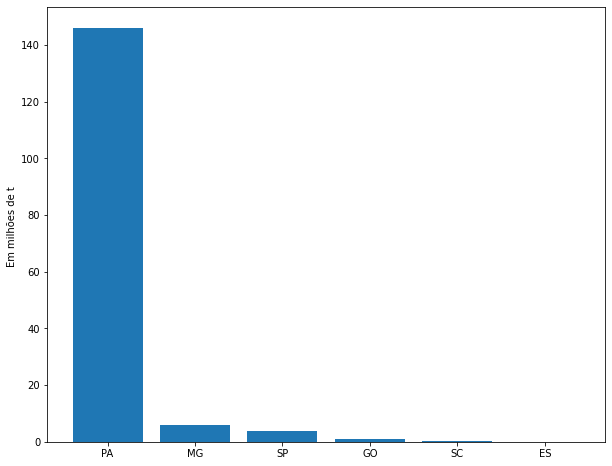

In [ ]:
# Implemente seu código aqui!
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

anos = list(range(2015,2021))
conta = {}
estados = ["AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA", "MT", "MS", "MG", "PA", "PB", "PR", "PA", "PI", "RJ", "RN", "RS", "RO", "RR", "SC", "SP", "SE", "TO"]

dadosvet = np.array(dados)

for i in range(1211345):
  ano = int(dadosvet[i][0])
  minerio = dadosvet[i][8]
  estado = dadosvet[i][9]
  if dadosvet[i][12] == '':
    dadosvet[i][12] = '0'
  if ano in anos and minerio == "BAUXITA" and estado in estados:
    peso = float(dadosvet[i][12].replace(',','.'))
    conta[estado] = conta.get(estado, 0) + peso

  
lista = []

for estado, peso in conta.items():
  lista.append((peso,estado))

lista.sort(reverse=True)
x=[]
y=[]

for j in lista:
  x.append(j[1])
  y.append(j[0]*10**(-6))

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(111)

ax1.bar(np.arange(len(x)), y)

ax1.set_xticks(np.arange(len(x)))

ax1.set_xticklabels(x)

plt.ylabel("Em milhões de t ")

plt.show()





Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Implemente códigos para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


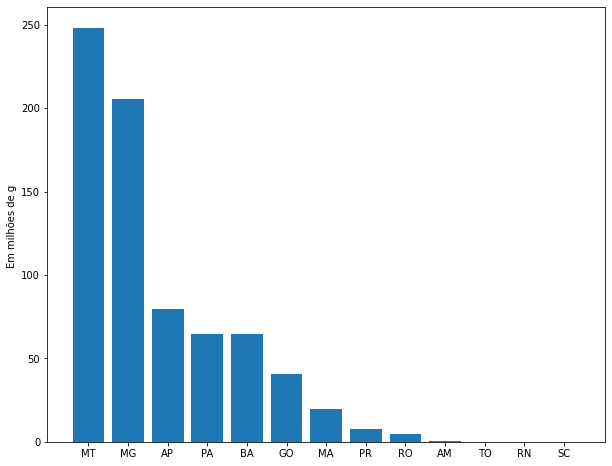

In [ ]:
# Faça seu código da Tarefa 3 aqui
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

anos = list(range(2010,2021))
conta = {}
estados = ["AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA", "MT", "MS", "MG", "PA", "PB", "PR", "PA", "PI", "RJ", "RN", "RS", "RO", "RR", "SC", "SP", "SE", "TO"]

dadosvet = np.array(dados)

for i in range(1211345):
  ano = int(dadosvet[i][0])
  minerio = dadosvet[i][8]
  estado = dadosvet[i][9]
  if dadosvet[i][12] == '':
    dadosvet[i][12] = '0'
  if ano in anos and minerio == "OURO" and estado in estados:
    peso = float(dadosvet[i][12].replace(',','.'))
    conta[estado] = conta.get(estado, 0) + peso

  
lista = []

for estado, peso in sorted(conta.items(), key=itemgetter(1), reverse = True):
  lista.append((peso,estado))


x=[]
y=[]

for j in lista:
  x.append(j[1])
  y.append(j[0]*10**(-6))

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(111)

ax1.bar(np.arange(len(x)), y)

ax1.set_xticks(np.arange(len(x)))

ax1.set_xticklabels(x)

plt.ylabel("Em milhões de g ")

plt.show()


In [ ]:
for i in range(100):
  minerio = dadosvet[i][8]
  print(minerio)




BASALTO







CASCALHO
AREIA ALUVIONAR
GRANITO
AREIA
QUARTZITO FRIÁVEL
AREIA
AREIA LAVADA
BASALTO P/ BRITA
SAIBRO
ARGILA COMUM
AREIA
AREIA
AREIA LAVADA
BASALTO
BRITA DE GRANITO
SAIBRO
BASALTO P/ BRITA
GRANITO P/ BRITA
AREIA
AREIA
AREIA
AREIA
BASALTO
CALCÁRIO
AREIA
ARGILA
CALCÁRIO
CALCÁRIO P/ BRITA
FOLHELHO ARDOSIANO
ARGILA
CALCÁRIO
AREIA LAVADA
BASALTO P/ REVESTIMENTO
AREIA
ARGILA
ARGILA
ARGILA
ARGILA COMUM
ARGILA COMUM
CALCÁRIO
AREIA
AREIA
AREIA COMUM
PEDRA QUARTZITO
AREIA
AREIA LAVADA
AREIA
AREIA
AREIA
GIPSITA
ÁGUA MINERAL
ARGILA
FOLHELHO ARDOSIANO
CAULIM
FELDSPATO
FOLHELHO ARDOSIANO
SAIBRO
SAIBRO
ARENITO
BASALTO
AREIA
ILMENITA
RUTILO
ZIRCONITA
MINÉRIO DE URÂNIO
PIROCLORO
AREIA
ARGILA
AREIA
CALCÁRIO
ÁGUA MINERAL
ARGILA
AREIA
ARGILA COMUM
ARGILA P/CER. VERMELH
AREIA FLUVIAL
ARGILA P/CER. VERMELH
GRANITO
AREIA
GRANITO P/ REVESTIMENTO
GRANITO
ARGILA VERMELHA
AREIA
ARGILA P/CER. VERMELH
AREIA
ÁGUA MINERAL
GRANITO ORNAMENTAL
AREIA
AMETISTA


Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Implemente códigos para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


[(4094406.0, 2003), (34235669.0, 2004), (70970623.84, 2005), (81411641.44, 2006), (87531234.54, 2007), (95368860.37, 2008), (87064457.71000001, 2009), (94947583.72, 2010), (103116103.76000002, 2011), (106427298.64000002, 2012), (104769923.44, 2013), (113305196.0, 2014), (121130616.47899999, 2015), (142035049.768, 2016), (162342039.1, 2017), (195191604.38000003, 2018), (192920678.11, 2019), (208894233.86999997, 2020), (33219501.79, 2021)]
[(68348040.0, 2003), (29181.0, 2004), (312315506.9209999, 2005), (155478906.5080001, 2006), (146222437.35300002, 2007), (152007419.30000004, 2008), (142309742.22800007, 2009), (147529484.14199993, 2010), (183561689.16300002, 2011), (152443094.98799998, 2012), (154705363.96299997, 2013), (176532936.16100007, 2014), (181245963.514, 2015), (145693625.45599997, 2016), (143745194.12300014, 2017), (139600543.83999994, 2018), (334322948.2199998, 2019), (105857413.49999999, 2020), (19756622.77, 2021)]


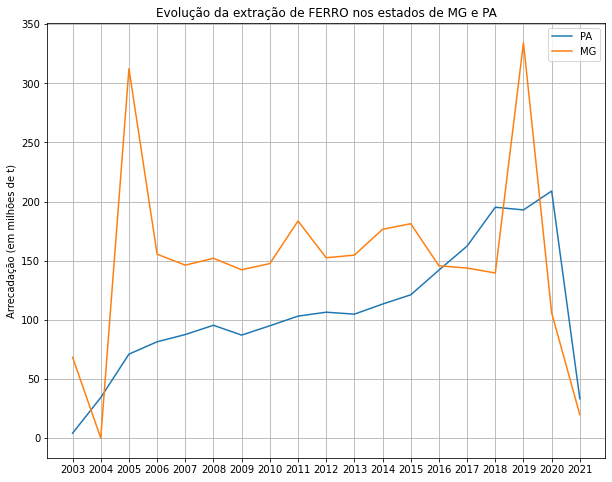

In [ ]:
# Faça seu código da Tarefa 4 aqui
import numpy as np
import matplotlib.pyplot as plt

anos = list(range(1991,2022))
contaPA = {}
contaMG = {}

dadosvet = np.array(dados)

for i in range(1211345):
  ano = int(dadosvet[i][0])
  minerio = dadosvet[i][8]
  estado = dadosvet[i][9]
  if dadosvet[i][12] == '':
    dadosvet[i][12] = '0'
  if ano in anos and minerio == "FERRO":
    if estado == "PA":
      pesoPA = float(dadosvet[i][12].replace(',','.'))
      contaPA[ano] = contaPA.get(ano, 0) + pesoPA
    if estado == "MG":
      pesoMG = float(dadosvet[i][12].replace(',','.'))
      contaMG[ano] = contaMG.get(ano, 0) + pesoMG
  
listaPA = []

for ano, pesoPA in contaPA.items():
  listaPA.append((pesoPA,ano))

listaMG = []

for ano, pesoMG in contaMG.items():
  listaMG.append((pesoMG,ano))

print(listaPA)
print(listaMG)

x1=[]
y1=[]

for j in listaPA:
  x1.append(j[1])
  y1.append(j[0]*10**(-6))

x2=[]
y2=[]

for l in listaMG:
  x2.append(l[1])
  y2.append(l[0]*10**(-6))


fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(111)

ax1.plot(np.arange(len(x1)), y1)

ax1.plot(np.arange(len(x2)), y2)

ax1.set_xticks(np.arange(len(x2)))

ax1.set_xticklabels(x2)

ax1.grid()

ax1.legend(('PA','MG'))

plt.title('Evolução da extração de FERRO nos estados de MG e PA')

plt.ylabel("Arrecadação (em milhões de t)")

plt.show()


Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Implemente um código para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.

Sugestão 1: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")

Sugestão 2: por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


['ÁGUA MINERAL', 'CARVÃO MINERAL', 'AREIA', 'CARVÃO', 'CALCÁRIO', 'BASALTO', 'GRANITO', 'OUTROS']
[0.0704726474640982, 0.11380593870912417, 0.07785018958325522, 0.1879562404585766, 0.12883970283236118, 0.13504262636539674, 0.046688749232184384, 0.2393439053550035]


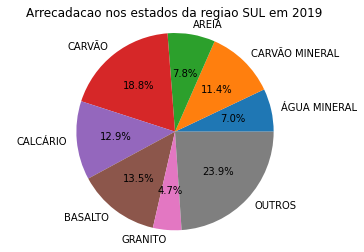

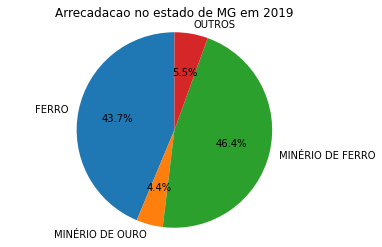

In [ ]:
# Faça seu código da Tarefa 5 aqui

estados = ['RS', 'SC', 'PR']

contaMG = {}
contaSUL = {}
totalSUL = 0
totalMG = 0

for i in range(1211345):
  ano = int(dadosvet[i][0])
  minerio = dadosvet[i][8]
  estado = dadosvet[i][9]
  if dadosvet[i][13] == '':
    dadosvet[i][13] = '0'
  if ano == 2019:
    if estado in estados:
      pesoSUL = float(dadosvet[i][13].replace(',','.'))
      contaSUL[minerio] = contaSUL.get(minerio,0) + pesoSUL
      totalSUL = totalSUL + pesoSUL
    if estado == 'MG':
      pesoMG = float(dadosvet[i][13].replace(',','.'))
      contaMG[minerio] = contaMG.get(minerio, 0) + pesoMG
      totalMG = totalMG + pesoMG

listaSUL = []

for minerio, pesoSUL in contaSUL.items():
  listaSUL.append((pesoSUL/totalSUL,minerio))

listaMG = []

for minerio, pesoMG in contaMG.items():
  listaMG.append((pesoMG/totalMG,minerio))

x1 = []
y1 = []

for item in listaSUL:
  if item[0] > 0.03:
    x1.append(item[1])
    y1.append(item[0])

x1.append('OUTROS')
resto = 1-sum(y1)
y1.append(resto)

print(x1)
print(y1)

fig1, ax1 = plt.subplots()

ax1.pie(y1, labels = x1, autopct='%1.1f%%')
ax1.axis('equal')

ax1.set(title='Arrecadacao nos estados da regiao SUL em 2019')

plt.show()

x2 = []
y2 = []

for item in listaMG:
  if item[0] > 0.03:
    x2.append(item[1])
    y2.append(item[0])

x2.append('OUTROS')
resto = 1-sum(y2)
y2.append(resto)

fig2, ax2 = plt.subplots()

ax2.pie(y2, labels = x2, autopct='%1.1f%%', startangle= 90)
ax2.axis('equal')

ax2.set(title='Arrecadacao no estado de MG em 2019')

plt.show()

